<a href="https://colab.research.google.com/github/ellen107/bilingual_mnist/blob/main/bilingual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [2]:
!git clone https://github.com/ellen107/bilingual_mnist.git

Cloning into 'bilingual_mnist'...
remote: Enumerating objects: 75040, done.
remote: Counting objects: 100% (75040/75040), done.
remote: Compressing objects: 100% (75037/75037), done.
remote: Total 75040 (delta 2), reused 75031 (delta 1), pack-reused 0
Receiving objects: 100% (75040/75040), 20.00 MiB | 20.24 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (75015/75015), done.


In [3]:
%cd /content/bilingual_mnist

/content/bilingual_mnist


In [4]:
import pathlib
data_dir = pathlib.Path("/content/bilingual_mnist/bilingual_data/")

batch_size = 32
img_height = 28
img_width = 28

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75009 files belonging to 15 classes.
Using 60008 files for training.


In [6]:
image_count = len(list(data_dir.glob('*/*.png')))
image_count

75009

In [7]:
one = list(data_dir.glob('1/*'))
PIL.Image.open(str(one[0]))

In [8]:
two = list(data_dir.glob('2/*'))
PIL.Image.open(str(two[0]))

In [9]:
hundred = list(data_dir.glob('100/*'))
PIL.Image.open(str(hundred[0]))

In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 75009 files belonging to 15 classes.
Using 15001 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '100', '1000', '10000', '100000000', '2', '3', '4', '5', '6', '7', '8', '9']


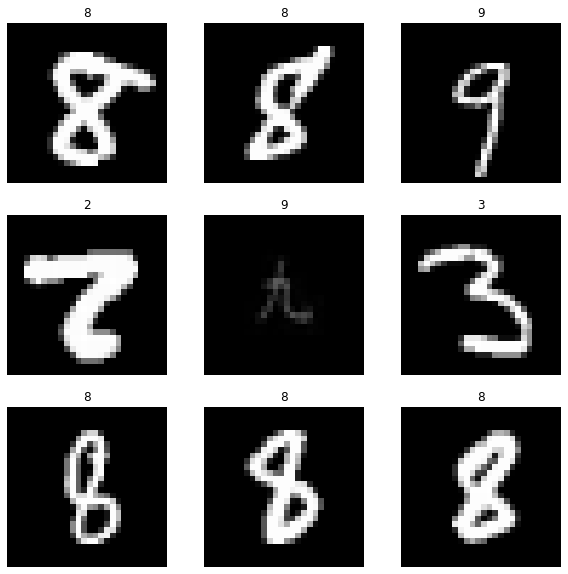

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
1160/1876 [=================>............] - ETA: 18s - loss: 0.5822 - accuracy: 0.8176

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)



========================== Compiling  model ==========================

========================== Model's Compiled ==========================



In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
from keras.preprocessing import image
from PIL import Image

In [ ]:
# Model Prediction
print("========================== Model Prediction ==========================")
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = cv.imread(path,0)
  img = cv.resize(img, (28, 28))
  img = np.reshape(img, [1, 28, 28, 1])
  print(np.argmax(model.predict(img)))